## Galactic kinematics of the solar neighborhood

In [1]:
# importing all the needed packages

import numpy as np
import pylab as pl
import matplotlib.pyplot as plt
import astropy.units as u
from galpy.orbit import Orbit
import galpy.util.coords as coords
from galpy.potential import MWPotential2014


### Simulated white dwarfs

Creating the velocity ellipsoid for white dwarfs (Table 1 from the report instructions), then plotting a random selection of velocities in a Toomre diagram, and converting one for each into cylindrical coordinates:

In [54]:
np.random.seed(0)

# velocity ellipsoid
UVW_thin = np.array([[-4.23,27.19],[-14.67,20.93],[-4.78,19.66]])
UVW_thick = np.array([[-28.82,59.94],[-48.63,34.69],[-6.43,39.7]])
UVW_halo = np.array([[-41.17,120.46],[-123.34,78.29],[-6.79,78.31]])

# we create three populations with N=15000 stars each, corresponding to the thick and thin disks and the halo
# we use random numbers following a gaussian distribution to generate the velocities of each star of each of the populations

N = 150
nUVW_thin = np.random.normal(UVW_thin[:,0],UVW_thin[:,1],(N,3))
nUVW_thick = np.random.normal(UVW_thick[:,0],UVW_thick[:,1],(N,3))
nUVW_halo = np.random.normal(UVW_halo[:,0],UVW_halo[:,1],(N,3))



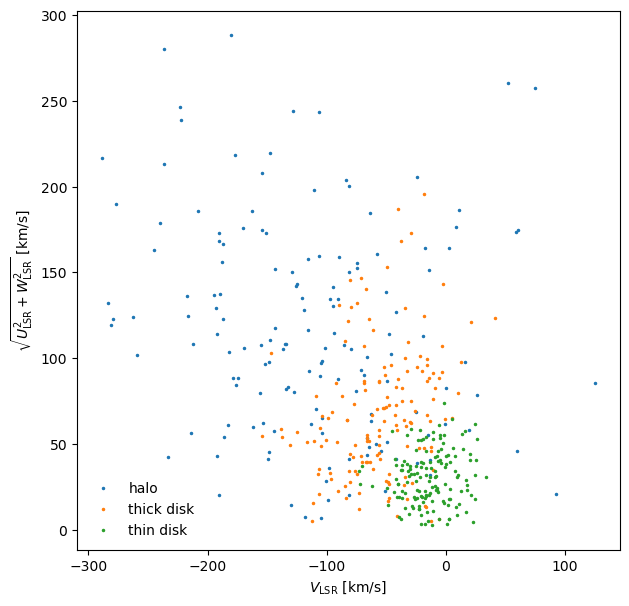

In [55]:
# and we plot the velocities distributions in a Toomre diagram

fig = pl.figure(figsize=(7,7))
fig.subplots_adjust(wspace=0.3)
ax1 = fig.add_subplot(111)

ax1.plot(nUVW_halo[:,1],np.sqrt(nUVW_halo[:,0]**2 + nUVW_halo[:,2]**2), marker='.', ms=3, ls='none', label='halo')
ax1.plot(nUVW_thick[:,1],np.sqrt(nUVW_thick[:,0]**2 + nUVW_thick[:,2]**2), marker='.', ms=3, ls='none', label='thick disk')
ax1.plot(nUVW_thin[:,1],np.sqrt(nUVW_thin[:,0]**2 + nUVW_thin[:,2]**2), marker='.', ms=3, ls='none', label='thin disk')

ax1.set_xlabel(r'$V_{\rm LSR}$ [km/s]')
ax1.set_ylabel(r'$\sqrt{U^2_{\rm LSR} + W^2_{\rm LSR}}$ [km/s]')

pl.legend(frameon=False)

pl.show()


Now we converto to cylindrical coordinates

In [40]:
# next, we convert to cylindrical coordinates

XYZ = np.array([8.030,0.0,0.025])

# we construct matrices of shape 15000x3 where each row is a different star and each column is a velocity component
# in cylindrical coordinates

# we create 3 different matrices, for thick disk, thin disk and halo stars

RTZ_thin = coords.rect_to_cyl(XYZ[0], XYZ[1], XYZ[2])
vRTZ_thin = coords.rect_to_cyl_vec(nUVW_thin[:,0],nUVW_thin[:,1],nUVW_thin[:,2],XYZ[0], XYZ[1], XYZ[2], cyl=False)

RTZ_thick = coords.rect_to_cyl(XYZ[0], XYZ[1], XYZ[2])
vRTZ_thick = coords.rect_to_cyl_vec(nUVW_thick[:,0],nUVW_thick[:,1],nUVW_thick[:,2],XYZ[0], XYZ[1], XYZ[2], cyl=False)

RTZ_halo = coords.rect_to_cyl(XYZ[0], XYZ[1], XYZ[2])
vRTZ_halo = coords.rect_to_cyl_vec(nUVW_halo[:,0],nUVW_halo[:,1],nUVW_halo[:,2],XYZ[0], XYZ[1], XYZ[2], cyl=False)

# we convert them from tuples into arrays

RTZ_thin=np.array(RTZ_thin)
RTZ_thick=np.array(RTZ_thick).T
RTZ_halo=np.array(RTZ_halo).T

vRTZ_thin=np.array(vRTZ_thin).T
vRTZ_thick=np.array(vRTZ_thick).T
vRTZ_halo=np.array(vRTZ_halo).T



We create three orbits for thin-disk, thick-disk, and halo white dwarfs, respectively. Then we create an array of timesteps, and finally we integrate the orbits.

In [16]:
R0, z0, V0, v_sun = 8.0*u.kpc, 0.025*u.kpc, 220.0*u.km/u.s, [-11.1, 7.25, 12.24]*u.km / u.s

star_thin=np.zeros((N,6))
star_thick=np.zeros((N,6))
star_halo=np.zeros((N,6))

for i in range(N):
    star_thin[i, 0] = RTZ_thin[0]/8.
    star_thin[i, 1] = vRTZ_thin[i, 0] / 220. 
    star_thin[i, 2] = 1 + vRTZ_thin[i, 1] / 220. 
    star_thin[i, 3] = RTZ_thin[2] / 8. 
    star_thin[i, 4] = vRTZ_thin[i, 2] / 220. 
    star_thin[i, 5] = RTZ_thin[1]  

    star_thick[i, 0] = RTZ_thick[0]/8.
    star_thick[i, 1] = vRTZ_thick[i, 0] / 220. 
    star_thick[i, 2] = 1 + vRTZ_thick[i, 1] / 220. 
    star_thick[i, 3] = RTZ_thick[2] / 8. 
    star_thick[i, 4] = vRTZ_thick[i, 2] / 220. 
    star_thick[i, 5] = RTZ_thick[1]

    star_halo[i, 0] = RTZ_halo[0]/8.
    star_halo[i, 1] = vRTZ_halo[i, 0] / 220. 
    star_halo[i, 2] = 1 + vRTZ_halo[i, 1] / 220. 
    star_halo[i, 3] = RTZ_halo[2] / 8. 
    star_halo[i, 4] = vRTZ_halo[i, 2] / 220. 
    star_halo[i, 5] = RTZ_halo[1]

ts = np.linspace(0,2,100)*u.Gyr # to test only

# we integrate ONE orbit

o_thin = Orbit(star_thin[0], ro=R0, zo=z0, vo=V0, solarmotion=v_sun)
o_thin.integrate(ts,MWPotential2014)

o_thick = Orbit(star_thick[0], ro=R0, zo=z0, vo=V0, solarmotion=v_sun)
o_thick.integrate(ts,MWPotential2014)

o_halo = Orbit(star_halo[0], ro=R0, zo=z0, vo=V0, solarmotion=v_sun)
o_halo.integrate(ts,MWPotential2014)

# we integrate all orbits

a_thin = Orbit(star_thin, ro=R0, zo=z0, vo=V0, solarmotion=v_sun)
a_thin.integrate(ts,MWPotential2014)

a_thick = Orbit(star_thick, ro=R0, zo=z0, vo=V0, solarmotion=v_sun)
a_thick.integrate(ts,MWPotential2014)

a_halo = Orbit(star_halo, ro=R0, zo=z0, vo=V0, solarmotion=v_sun)
a_halo.integrate(ts,MWPotential2014)

# printing eccentricity and angular momentum (z component)
print('e = ', o_thin.e(), 'Lz = ', o_thin.Lz(quantity=True))
print('e = ', o_thick.e(), 'Lz = ', o_thick.Lz(quantity=True))
print('e = ', o_halo.e(), 'Lz = ', o_halo.Lz(quantity=True))


e =  0.1500751335939185 Lz =  1716.0534816801414 km kpc / s
e =  0.4695654137735398 Lz =  1027.1215475477404 km kpc / s
e =  0.32165658098056105 Lz =  1544.6927532187292 km kpc / s


Plotting the orbits

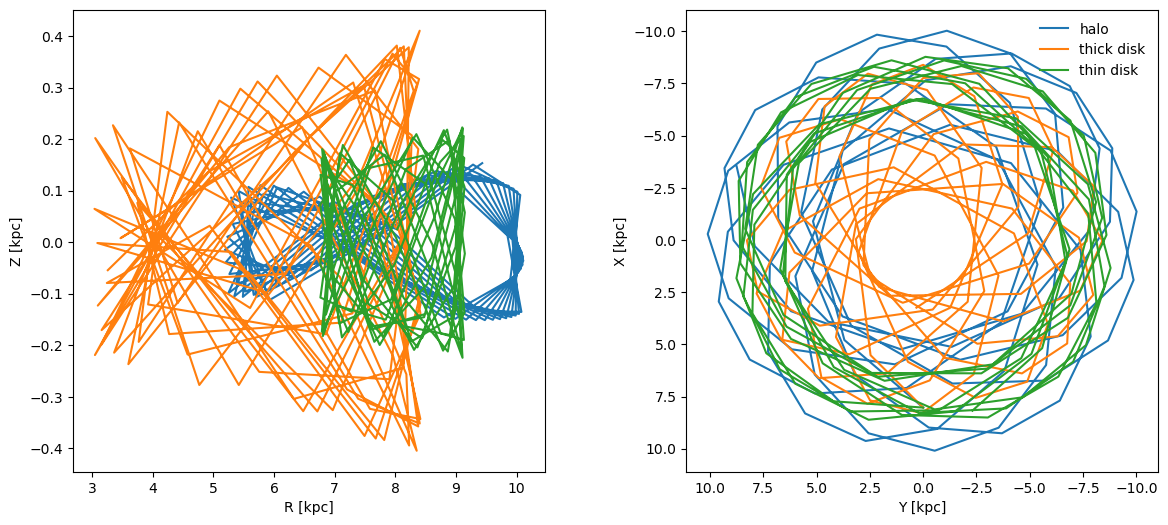

In [17]:
fig = pl.figure(figsize=(14,6))
fig.subplots_adjust(wspace=0.3)

# we plot ONE of the integrated orbits

ax1 = fig.add_subplot(121)
ax1.plot(o_halo.R(ts,quantity=True),o_halo.z(ts,quantity=True))
ax1.plot(o_thick.R(ts,quantity=True),o_thick.z(ts,quantity=True))
ax1.plot(o_thin.R(ts,quantity=True),o_thin.z(ts,quantity=True))
ax1.set_xlabel('R [kpc]')
ax1.set_ylabel('Z [kpc]')

ax2 = fig.add_subplot(122)
ax2.plot(o_halo.y(ts,quantity=True),o_halo.x(ts,quantity=True), label='halo')
ax2.plot(o_thick.y(ts,quantity=True),o_thick.x(ts,quantity=True), label='thick disk')
ax2.plot(o_thin.y(ts,quantity=True),o_thin.x(ts,quantity=True), label='thin disk')
ax2.set_xlabel('Y [kpc]')
ax2.set_ylabel('X [kpc]')

pl.legend(frameon=False)

ax2.invert_xaxis()
ax2.invert_yaxis()
pl.show()


Plotting vertical component of angular momentum (Lz) vs orbital eccentricity.

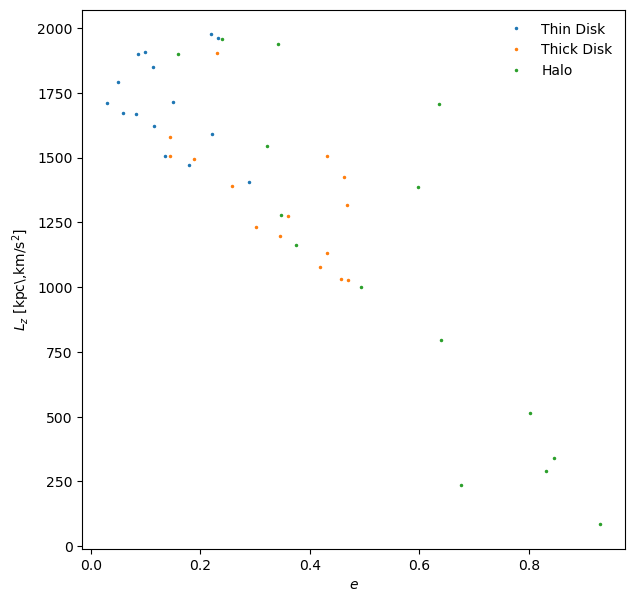

In [18]:
fig = pl.figure(figsize=(7,7))
fig.subplots_adjust(wspace=0.3)
ax1 = fig.add_subplot(111)

# we use all of the integrated orbits

ax1.plot(a_thin.e(),a_thin.Lz(quantity=True), marker='.', ms=3, ls='none', label='Thin Disk')
ax1.plot(a_thick.e(),a_thick.Lz(quantity=True), marker='.', ms=3, ls='none', label='Thick Disk')
ax1.plot(a_halo.e(),a_halo.Lz(quantity=True), marker='.', ms=3, ls='none', label='Halo')

ax1.set_xlabel(r'$e$')
ax1.set_ylabel(r'$L_z$ [kpc\,km/s$^2$]')
pl.savefig("sim_Toomre_Diagram.png", dpi=150, bbox_inches='tight')
pl.legend(frameon=False)

pl.show()

We plot the combined histograms (halo, thin disk and thick disk) of the Galactocentric radii and vertical component, at a specific moment in time (1 Gyr) in our integration interval.

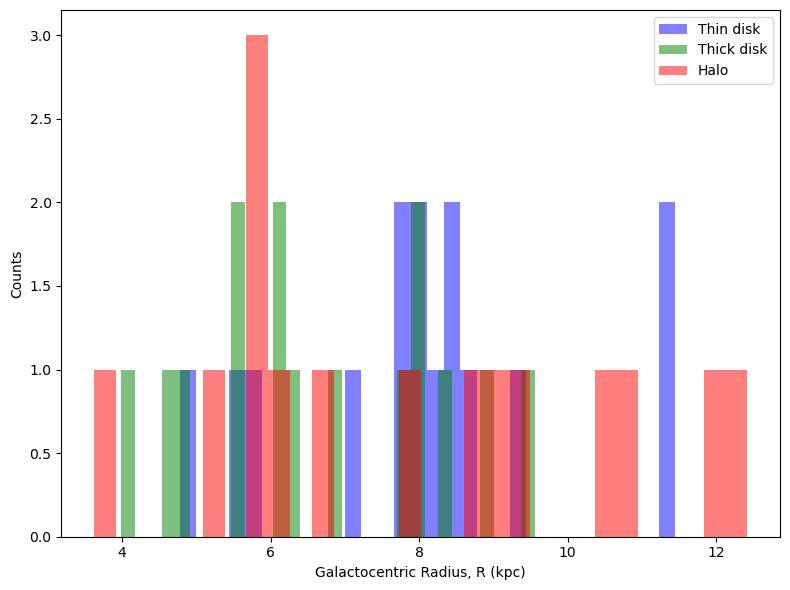

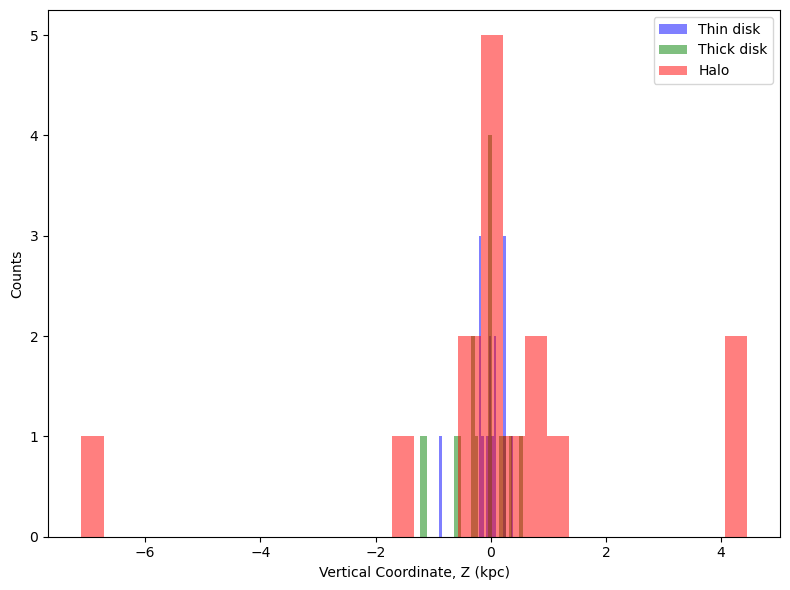

In [19]:
# we choose an intermediate time, 1 Gyr
time_index = np.argmin(np.abs(ts - 1.0 * u.Gyr))  # find the index closer to 1 Gyr

# obtain positions R and Z at that moment
R_thin = a_thin.R(time_index)  # R en kpc
Z_thin = a_thin.z(time_index)  # Z en kpc

R_thick = a_thick.R(time_index)
Z_thick = a_thick.z(time_index)

R_halo = a_halo.R(time_index)
Z_halo = a_halo.z(time_index)


# R histogram
fig1 = pl.figure(figsize=(8, 6))
pl.hist(R_thin, bins=30, alpha=0.5, label='Thin disk', color='blue') # density = True for normalized counts, we didn't normalize them
pl.hist(R_thick, bins=30, alpha=0.5, label='Thick disk', color='green')
pl.hist(R_halo, bins=30, alpha=0.5, label='Halo', color='red')
pl.xlabel('Galactocentric Radius, R (kpc)')
pl.ylabel('Counts')
pl.legend()
pl.tight_layout()
pl.savefig("simulated_histogram1.png", dpi=150, bbox_inches='tight')
pl.show()

# Z histogram 
fig2 = pl.figure(figsize=(8, 6))
pl.hist(Z_thin, bins=30, alpha=0.5, label='Thin disk', color='blue')
pl.hist(Z_thick, bins=30, alpha=0.5, label='Thick disk', color='green')
pl.hist(Z_halo, bins=30, alpha=0.5, label='Halo', color='red')
pl.xlabel('Vertical Coordinate, Z (kpc)')
pl.ylabel('Counts')
pl.legend()
pl.tight_layout()
pl.savefig("simulated_histogram2.png", dpi=150, bbox_inches='tight')
pl.show()

Now, we want to compare the distribution of the guiding-center radii of simulated wd and real wd. We plot the guiding-center radius in terms of the z-component of the angular momentum and of the excentricity for the simulated white dwarfs.

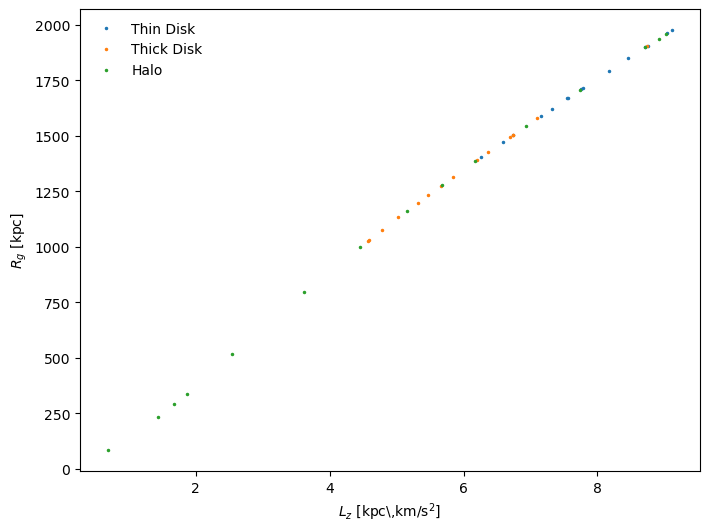

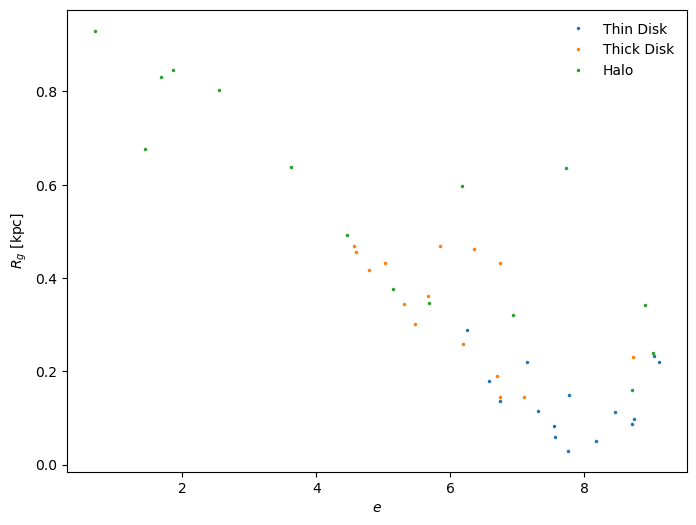

In [25]:
# we obtain the value of the guiding center radii by using .rguiding()

# we use all of the integrated orbits

#  guiding center radius vs Lz
fig1 = pl.figure(figsize=(8, 6))
pl.plot(a_thin.rguiding(),a_thin.Lz(quantity=True), marker='.', ms=3, ls='none', label='Thin Disk')
pl.plot(a_thick.rguiding(),a_thick.Lz(quantity=True), marker='.', ms=3, ls='none', label='Thick Disk')
pl.plot(a_halo.rguiding(),a_halo.Lz(quantity=True), marker='.', ms=3, ls='none', label='Halo')
pl.xlabel(r'$L_z$ [kpc\,km/s$^2$]')
pl.ylabel(r'$R_g$ [kpc]')
pl.savefig("sim_gr_Lz.png", dpi=150, bbox_inches='tight')
pl.legend(frameon=False)
pl.show()

# guiding center radius vs e
fig2 = pl.figure(figsize=(8, 6))
pl.plot(a_thin.rguiding(),a_thin.e(), marker='.', ms=3, ls='none', label='Thin Disk')
pl.plot(a_thick.rguiding(),a_thick.e(), marker='.', ms=3, ls='none', label='Thick Disk')
pl.plot(a_halo.rguiding(),a_halo.e(), marker='.', ms=3, ls='none', label='Halo')
pl.xlabel(r'$e$')
pl.ylabel(r'$R_g$ [kpc]')
pl.savefig("sim_gr_e.png", dpi=150, bbox_inches='tight')
pl.legend(frameon=False)
pl.show()


Now we will fix the radial velocity to 0 for all the simulated white dwarfs. We modify the input parameters of the orbit command after initializing the orbit but before integrating it.

In [51]:
# next, we convert to cylindrical coordinates

XYZ = np.array([8.030,0.0,0.025])

# we construct matrices of shape 15000x3 where each row is a different star and each column is a velocity component
# in cylindrical coordinates

# we create 3 different matrices, for thick disk, thin disk and halo stars

RTZ_thin = coords.rect_to_cyl(XYZ[0], XYZ[1], XYZ[2])
vRTZ_thin = coords.rect_to_cyl_vec(nUVW_thin[:,0],nUVW_thin[:,1],nUVW_thin[:,2],XYZ[0], XYZ[1], XYZ[2], cyl=False)

RTZ_thick = coords.rect_to_cyl(XYZ[0], XYZ[1], XYZ[2])
vRTZ_thick = coords.rect_to_cyl_vec(nUVW_thick[:,0],nUVW_thick[:,1],nUVW_thick[:,2],XYZ[0], XYZ[1], XYZ[2], cyl=False)

RTZ_halo = coords.rect_to_cyl(XYZ[0], XYZ[1], XYZ[2])
vRTZ_halo = coords.rect_to_cyl_vec(nUVW_halo[:,0],nUVW_halo[:,1],nUVW_halo[:,2],XYZ[0], XYZ[1], XYZ[2], cyl=False)

# we convert them from tuples into arrays

RTZ_thin=np.array(RTZ_thin)
RTZ_thick=np.array(RTZ_thick).T
RTZ_halo=np.array(RTZ_halo).T

vRTZ_thin=np.array(vRTZ_thin).T
vRTZ_thick=np.array(vRTZ_thick).T
vRTZ_halo=np.array(vRTZ_halo).T

for i in range(len(vRTZ_thin)):
    vRTZ_thin[i, 0]=0
    vRTZ_thick[i, 0]=0
    vRTZ_halo[i, 0]=0

In [52]:
R0, z0, V0, v_sun = 8.0*u.kpc, 0.025*u.kpc, 220.0*u.km/u.s, [-11.1, 7.25, 12.24]*u.km / u.s

star_thin=np.zeros((N,6))
star_thick=np.zeros((N,6))
star_halo=np.zeros((N,6))

for i in range(N):
    star_thin[i, 0] = RTZ_thin[0]/8.
    star_thin[i, 1] = vRTZ_thin[i, 0] / 220. 
    star_thin[i, 2] = 1 + vRTZ_thin[i, 1] / 220. 
    star_thin[i, 3] = RTZ_thin[2] / 8. 
    star_thin[i, 4] = vRTZ_thin[i, 2] / 220. 
    star_thin[i, 5] = RTZ_thin[1]  

    star_thick[i, 0] = RTZ_thick[0]/8.
    star_thick[i, 1] = vRTZ_thick[i, 0] / 220. 
    star_thick[i, 2] = 1 + vRTZ_thick[i, 1] / 220. 
    star_thick[i, 3] = RTZ_thick[2] / 8. 
    star_thick[i, 4] = vRTZ_thick[i, 2] / 220. 
    star_thick[i, 5] = RTZ_thick[1]

    star_halo[i, 0] = RTZ_halo[0]/8.
    star_halo[i, 1] = vRTZ_halo[i, 0] / 220. 
    star_halo[i, 2] = 1 + vRTZ_halo[i, 1] / 220. 
    star_halo[i, 3] = RTZ_halo[2] / 8. 
    star_halo[i, 4] = vRTZ_halo[i, 2] / 220. 
    star_halo[i, 5] = RTZ_halo[1]

ts = np.linspace(0,2,100)*u.Gyr # to test only

# we integrate ONE orbit

o_thin = Orbit(star_thin[0], ro=R0, zo=z0, vo=V0, solarmotion=v_sun)
o_thin.integrate(ts,MWPotential2014)

o_thick = Orbit(star_thick[0], ro=R0, zo=z0, vo=V0, solarmotion=v_sun)
o_thick.integrate(ts,MWPotential2014)

o_halo = Orbit(star_halo[0], ro=R0, zo=z0, vo=V0, solarmotion=v_sun)
o_halo.integrate(ts,MWPotential2014)

# we integrate all orbits

a_thin = Orbit(star_thin, ro=R0, zo=z0, vo=V0, solarmotion=v_sun)
a_thin.integrate(ts,MWPotential2014)

a_thick = Orbit(star_thick, ro=R0, zo=z0, vo=V0, solarmotion=v_sun)
a_thick.integrate(ts,MWPotential2014)

a_halo = Orbit(star_halo, ro=R0, zo=z0, vo=V0, solarmotion=v_sun)
a_halo.integrate(ts,MWPotential2014)

# printing eccentricity and angular momentum (z component)
print('e = ', o_thin.e(), 'Lz = ', o_thin.Lz(quantity=True))
print('e = ', o_thick.e(), 'Lz = ', o_thick.Lz(quantity=True))
print('e = ', o_halo.e(), 'Lz = ', o_halo.Lz(quantity=True))

e =  0.029751228083537112 Lz =  1716.0534816801414 km kpc / s
e =  0.10017954635920928 Lz =  1604.589911738649 km kpc / s
e =  0.8095670746770663 Lz =  346.52261028465614 km kpc / s


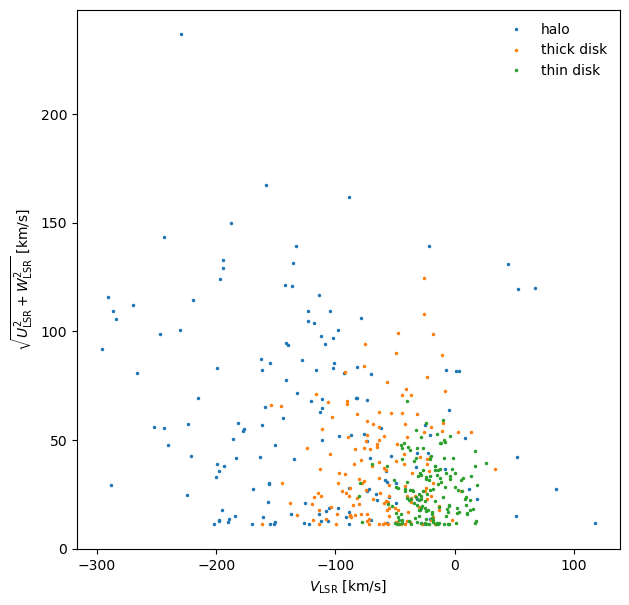

In [53]:
fig = pl.figure(figsize=(7,7))
fig.subplots_adjust(wspace=0.3)
ax1 = fig.add_subplot(111)

# using all of the integrated orbits

ax1.plot(a_halo.V(),np.sqrt(a_halo.U()**2 + a_halo.W()**2), marker='.', ms=3, ls='none', label='halo')
ax1.plot(a_thick.V(),np.sqrt(a_thick.U()**2 + a_thick.W()**2), marker='.', ms=3, ls='none', label='thick disk')
ax1.plot(a_thin.V(),np.sqrt(a_thin.U()**2 + a_thin.W()**2), marker='.', ms=3, ls='none', label='thin disk')

ax1.set_xlabel(r'$V_{\rm LSR}$ [km/s]')
ax1.set_ylabel(r'$\sqrt{U^2_{\rm LSR} + W^2_{\rm LSR}}$ [km/s]')
pl.savefig('sim_Toomre_diagram_Vr=0')
pl.legend(frameon=False)

pl.show()

### Observed white dwarfs

Loading the CSV file into a python array. The CSV file is the Gaia 100-pc white dwarf sample that was classified by Torres et al. 2019, MNRAS, 485, 5573-5589) with a random forest algorithm.

In [26]:
np.random.seed(0)

# for local files, just use this function #
R = np.genfromtxt('./data/Gaia_100pcWD.csv', delimiter=',', names=True, dtype=None, encoding="ASCII")
print(R.dtype)

# masking the galactic components by using the lable defined by Torres et al.
mask_thin = np.where(R['Ilabel_0thin1thick2halo']==0) # 0 for thin disk stars
mask_thick = np.where(R['Ilabel_0thin1thick2halo']==1) # 1 for thick disk stars
mask_halo = np.where(R['Ilabel_0thin1thick2halo']==2) # 2 for halo stars


[('Name', '<U19'), ('RA_deg', '<f8'), ('DEC_deg', '<f8'), ('parallax_mas', '<f8'), ('pmramasyr', '<f8'), ('pmdec_masyr', '<f8'), ('Ilabel_0thin1thick2halo', '<i4')]


We create three orbits for thin-disk, thick-disk, and halo white dwarfs, respectively. Then we create an array of timesteps, and finally we integrate the orbits.

In [27]:
R0, z0, V0, v_sun = 8.122*u.kpc, 0.0208*u.kpc, 235.*u.km/u.s, [12.9, 10.6, 7.78]*u.km / u.s

star_thin = R[mask_thin]
star_thick = R[mask_thick]
star_halo = R[mask_halo]

ts = np.linspace(0,2,100)*u.Gyr

# integrate ONE orbit only
o_thin = Orbit([star_thin['RA_deg'][0],star_thin['DEC_deg'][0],1/star_thin['parallax_mas'][0], # distance=1/parallax
                star_thin['pmramasyr'][0],star_thin['pmdec_masyr'][0], 0.],                    # parallax in miliarcseconds
                 radec=True, ro=R0, zo=z0, vo=V0, solarmotion=v_sun)                           # masyr=miliarcseconds/year
o_thin.integrate(ts,MWPotential2014)

o_thick = Orbit([star_thick['RA_deg'][10],star_thick['DEC_deg'][10],1/star_thick['parallax_mas'][10],
                star_thick['pmramasyr'][10],star_thick['pmdec_masyr'][10], 0.],
                 radec=True, ro=R0, zo=z0, vo=V0, solarmotion=v_sun)
o_thick.integrate(ts,MWPotential2014)

o_halo = Orbit([star_halo['RA_deg'][-1],star_halo['DEC_deg'][-1],1/star_halo['parallax_mas'][-1],
                star_halo['pmramasyr'][-1],star_halo['pmdec_masyr'][-1], 0.],
                 radec=True, ro=R0, zo=z0, vo=V0, solarmotion=v_sun)
o_halo.integrate(ts,MWPotential2014)

# integrate all of the orbits
a_thin = Orbit([star_thin['RA_deg'][0:5000],star_thin['DEC_deg'][0:5000],1/star_thin['parallax_mas'][0:5000],
                star_thin['pmramasyr'][0:5000],star_thin['pmdec_masyr'][0:5000], np.zeros(len(star_thin[0:5000]))],
                 radec=True, ro=R0, zo=z0, vo=V0, solarmotion=v_sun)
a_thin.integrate(ts,MWPotential2014)

a_thick = Orbit([star_thick['RA_deg'],star_thick['DEC_deg'],1/star_thick['parallax_mas'],
                star_thick['pmramasyr'],star_thick['pmdec_masyr'], np.zeros(len(star_thick))],
                 radec=True, ro=R0, zo=z0, vo=V0, solarmotion=v_sun)
a_thick.integrate(ts,MWPotential2014)

a_halo = Orbit([star_halo['RA_deg'],star_halo['DEC_deg'],1/star_halo['parallax_mas'],
                star_halo['pmramasyr'],star_halo['pmdec_masyr'], np.zeros(len(star_halo))],
                 radec=True, ro=R0, zo=z0, vo=V0, solarmotion=v_sun)
a_halo.integrate(ts,MWPotential2014)


# printing eccentricity and angular momentum (z component)
print('e = ', round(o_thin.e(),3), 'Lz = ', o_thin.Lz(quantity=True))
print('e = ', round(o_thick.e(),3), 'Lz = ', o_thick.Lz(quantity=True))
print('e = ', round(o_halo.e(),3), 'Lz = ', o_halo.Lz(quantity=True))


e =  0.087 Lz =  2043.2308341223043 km kpc / s
e =  0.203 Lz =  1721.3925753403396 km kpc / s
e =  0.66 Lz =  -1531.2100611279463 km kpc / s


We plot the combined histograms (halo, thin disk and thick disk) of the Galactocentric radii and vertical component, at a specific moment in time (1 Gyr) in our integration interval.

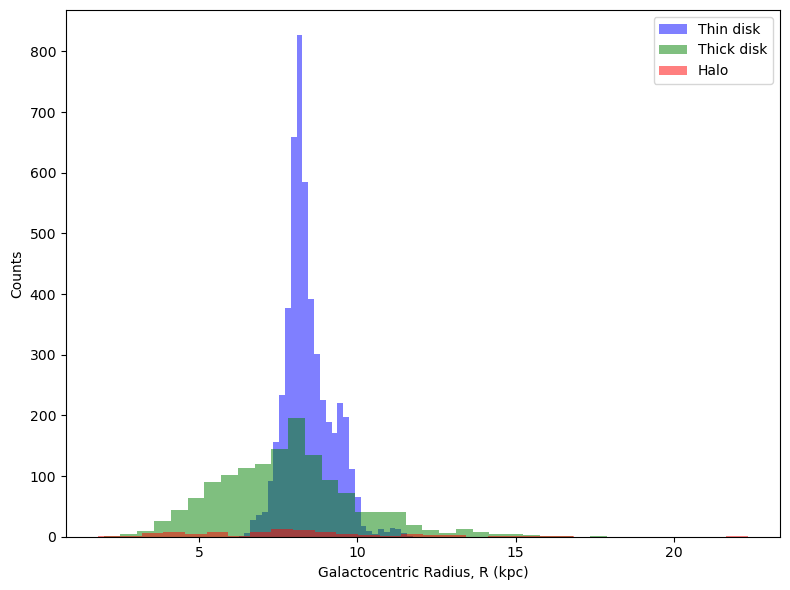

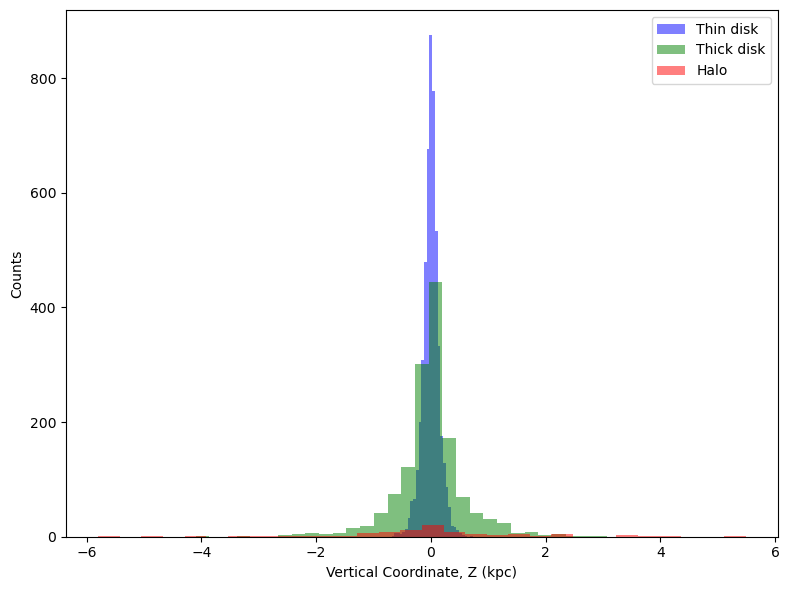

In [30]:
# we choose an intermediate time, 1 Gyr
time_index = np.argmin(np.abs(ts - 1.0 * u.Gyr))  # find the index closer to 1 Gyr

# obtain positions R and Z at that moment
R_thin = a_thin.R(time_index)  # R en kpc
Z_thin = a_thin.z(time_index)  # Z en kpc

R_thick = a_thick.R(time_index)
Z_thick = a_thick.z(time_index)

R_halo = a_halo.R(time_index)
Z_halo = a_halo.z(time_index)


# R histogram
fig1 = pl.figure(figsize=(8, 6))
pl.hist(R_thin, bins=30, alpha=0.5, label='Thin disk', color='blue') # density = True for normalized counts, we didn't normalize them
pl.hist(R_thick, bins=30, alpha=0.5, label='Thick disk', color='green')
pl.hist(R_halo, bins=30, alpha=0.5, label='Halo', color='red')
pl.xlabel('Galactocentric Radius, R (kpc)')
pl.ylabel('Counts')
pl.legend()
pl.tight_layout()
pl.savefig("realwd_histogramR.png", dpi=150, bbox_inches='tight')
pl.show()

# Z histogram 
fig2 = pl.figure(figsize=(8, 6))
pl.hist(Z_thin, bins=30, alpha=0.5, label='Thin disk', color='blue')
pl.hist(Z_thick, bins=30, alpha=0.5, label='Thick disk', color='green')
pl.hist(Z_halo, bins=30, alpha=0.5, label='Halo', color='red')
pl.xlabel('Vertical Coordinate, Z (kpc)')
pl.ylabel('Counts')
pl.legend()
pl.tight_layout()
pl.savefig("realwd_histogramZ.png", dpi=150, bbox_inches='tight')
pl.show()

Plotting the Toomre diagram of the observed sample of white dwarfs.

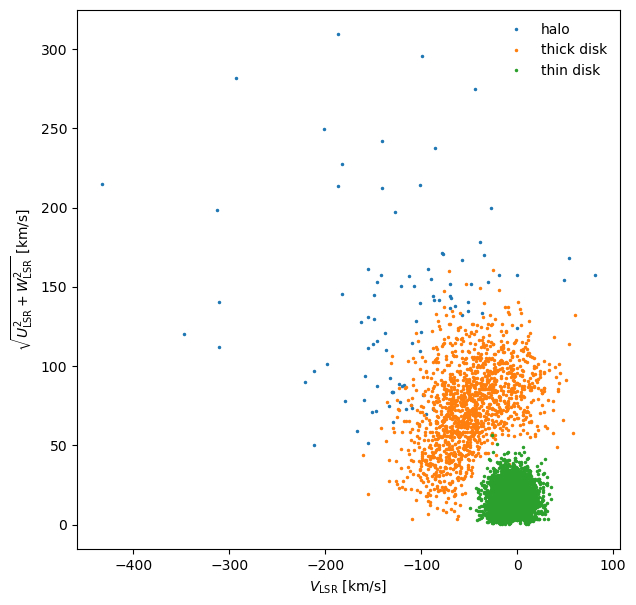

In [34]:

fig = pl.figure(figsize=(7,7))
fig.subplots_adjust(wspace=0.3)
ax1 = fig.add_subplot(111)

# using all of the integrated orbits

ax1.plot(a_halo.V(),np.sqrt(a_halo.U()**2 + a_halo.W()**2), marker='.', ms=3, ls='none', label='halo')
ax1.plot(a_thick.V(),np.sqrt(a_thick.U()**2 + a_thick.W()**2), marker='.', ms=3, ls='none', label='thick disk')
ax1.plot(a_thin.V(),np.sqrt(a_thin.U()**2 + a_thin.W()**2), marker='.', ms=3, ls='none', label='thin disk')

ax1.set_xlabel(r'$V_{\rm LSR}$ [km/s]')
ax1.set_ylabel(r'$\sqrt{U^2_{\rm LSR} + W^2_{\rm LSR}}$ [km/s]')

pl.legend(frameon=False)

pl.show()

Plotting vertical component of angular momentum (Lz) vs orbital eccentricity.

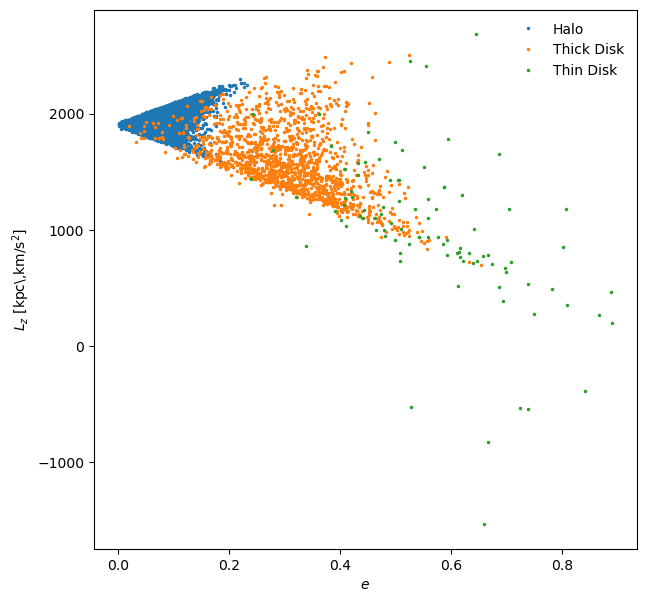

In [32]:
fig = pl.figure(figsize=(7,7))
fig.subplots_adjust(wspace=0.3)
ax1 = fig.add_subplot(111)

# using all the integrated orbits

ax1.plot(a_thin.e(),a_thin.Lz(), marker='.', ms=3, ls='none', label='Halo')
ax1.plot(a_thick.e(),a_thick.Lz(), marker='.', ms=3, ls='none', label='Thick Disk')
ax1.plot(a_halo.e(),a_halo.Lz(), marker='.', ms=3, ls='none', label='Thin Disk')

ax1.set_xlabel(r'$e$')
ax1.set_ylabel(r'$L_z$ [kpc\,km/s$^2$]')

pl.legend(frameon=False)
pl.show()

Now, we want to compare the distribution of the guiding-center radii of simulated wd and real wd. We plot the guiding-center radius in terms of the z-component of the angular momentum and of the excentricity for the simulated white dwarfs.

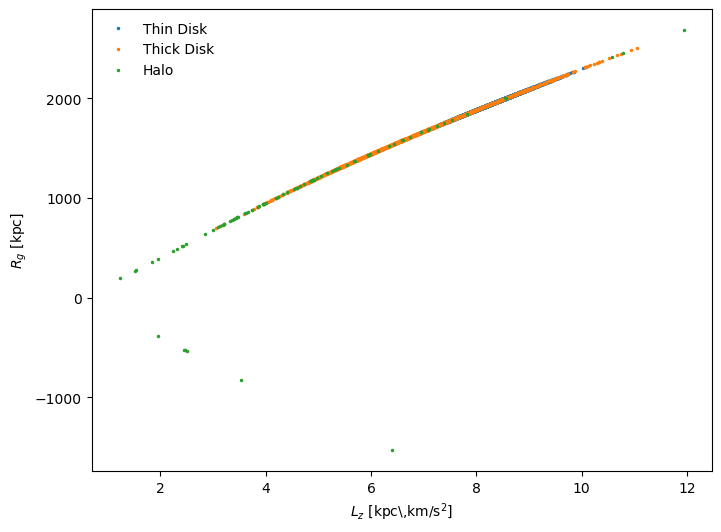

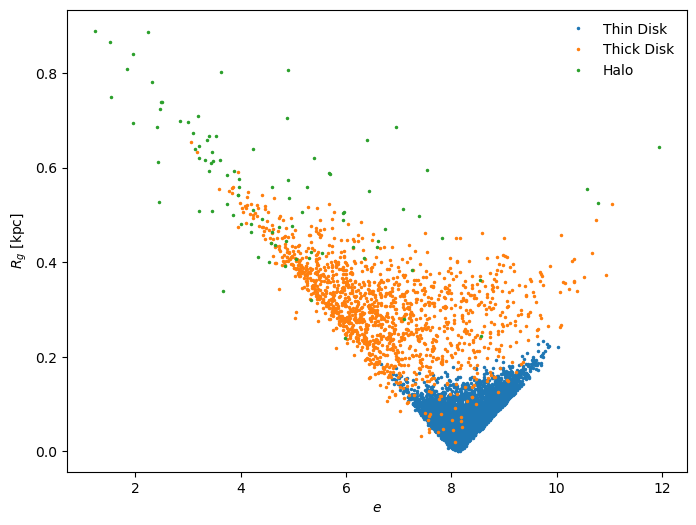

In [33]:
# we obtain the value of the guiding center radii by using .rguiding()

# we use all of the integrated orbits

#  guiding center radius vs Lz
fig1 = pl.figure(figsize=(8, 6))
pl.plot(a_thin.rguiding(),a_thin.Lz(quantity=True), marker='.', ms=3, ls='none', label='Thin Disk')
pl.plot(a_thick.rguiding(),a_thick.Lz(quantity=True), marker='.', ms=3, ls='none', label='Thick Disk')
pl.plot(a_halo.rguiding(),a_halo.Lz(quantity=True), marker='.', ms=3, ls='none', label='Halo')
pl.xlabel(r'$L_z$ [kpc\,km/s$^2$]')
pl.ylabel(r'$R_g$ [kpc]')
pl.savefig("sim_gr_Lz.png", dpi=150, bbox_inches='tight')
pl.legend(frameon=False)
pl.show()

# guiding center radius vs e
fig2 = pl.figure(figsize=(8, 6))
pl.plot(a_thin.rguiding(),a_thin.e(), marker='.', ms=3, ls='none', label='Thin Disk')
pl.plot(a_thick.rguiding(),a_thick.e(), marker='.', ms=3, ls='none', label='Thick Disk')
pl.plot(a_halo.rguiding(),a_halo.e(), marker='.', ms=3, ls='none', label='Halo')
pl.xlabel(r'$e$')
pl.ylabel(r'$R_g$ [kpc]')
pl.savefig("sim_gr_e.png", dpi=150, bbox_inches='tight')
pl.legend(frameon=False)
pl.show()

### Observed stars

Loading the CSV file into a python array. The CSV file is the Gaia 100pcStars. This file doesn't differentiate thin disk, thick disk and halo stars. 

In [4]:
np.random.seed(0)

# for local files, just use this function #
R = np.genfromtxt('./data/Gaia100pcStars.csv', delimiter=',', names=True, dtype=None, encoding="ASCII")
print(R.dtype)


[('source_id', '<i8'), ('ra', '<f8'), ('dec', '<f8'), ('parallax', '<f8'), ('pmra', '<f8'), ('pmdec', '<f8'), ('radial_velocity', '<f8')]


We create three orbits for thin-disk, thick-disk, and halo white dwarfs, respectively. Then we create an array of timesteps, and finally we integrate the orbits.

In [8]:
R0, z0, V0, v_sun = 8.122*u.kpc, 0.0208*u.kpc, 235.*u.km/u.s, [12.9, 10.6, 7.78]*u.km / u.s

stars = R
ts = np.linspace(0,2,100)*u.Gyr

# integrate ONE orbit only
o_stars = Orbit([stars['ra'][0],stars['dec'][0],1/stars['parallax'][0], # distance=1/parallax
                stars['pmra'][0],stars['pmdec'][0], 0.],                # parallax in miliarcseconds
                 radec=True, ro=R0, zo=z0, vo=V0, solarmotion=v_sun)    # masyr=miliarcseconds/year
o_stars.integrate(ts,MWPotential2014)

# integrate all of the orbits
a_stars = Orbit([stars['ra'][0:5000],stars['dec'][0:5000],1/stars['parallax'][0:5000],
                stars['pmra'][0:5000],stars['pmdec'][0:5000], np.zeros(len(stars[0:5000]))],
                 radec=True, ro=R0, zo=z0, vo=V0, solarmotion=v_sun)
a_stars.integrate(ts,MWPotential2014)


# printing eccentricity and angular momentum (z component)
print('e = ', round(o_stars.e(),3), 'Lz = ', o_stars.Lz(quantity=True))


e =  0.067 Lz =  1984.667093638966 km kpc / s


We plot the combined histograms (halo, thin disk and thick disk) of the Galactocentric radii and vertical component, at a specific moment in time (1 Gyr) in our integration interval.

C:\Users\marti\AppData\Local\Temp\ipykernel_18940\954303083.py:13: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  pl.legend()



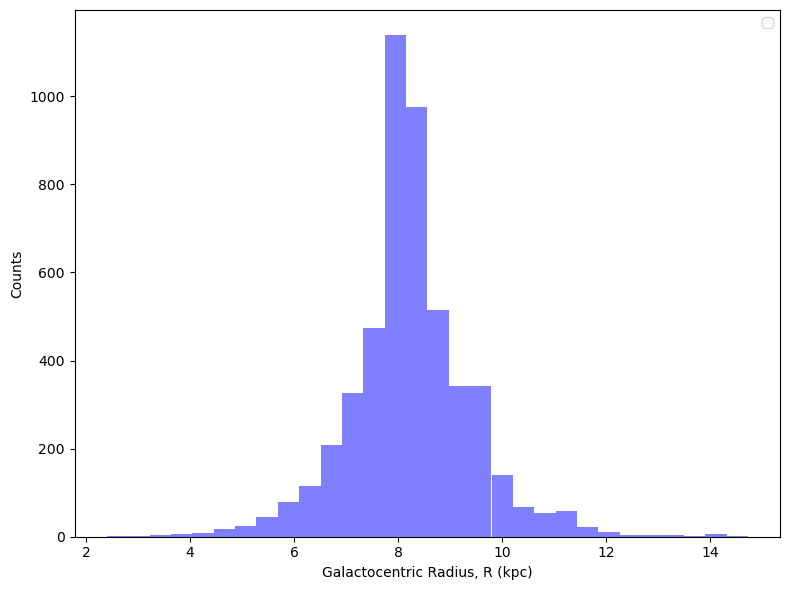

C:\Users\marti\AppData\Local\Temp\ipykernel_18940\954303083.py:23: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  pl.legend()



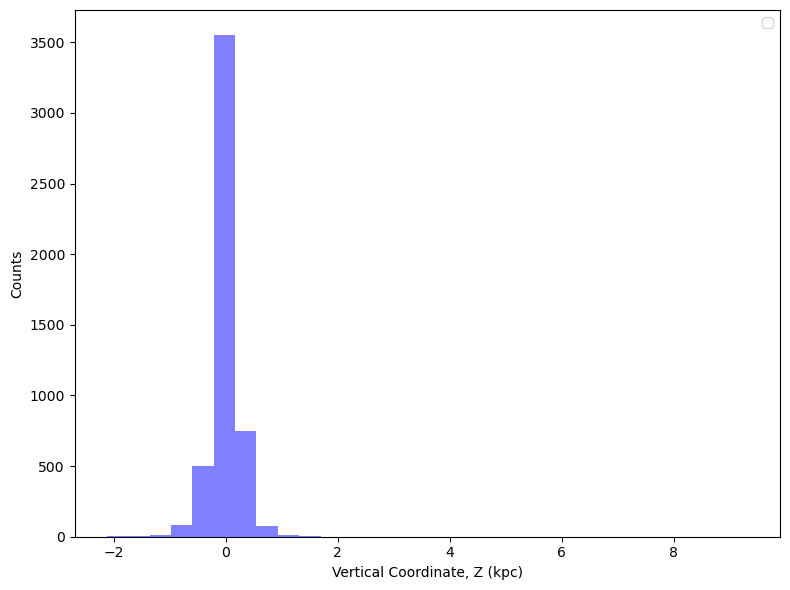

In [10]:
# we choose an intermediate time, 1 Gyr
time_index = np.argmin(np.abs(ts - 1.0 * u.Gyr))  # find the index closer to 1 Gyr

# obtain positions R and Z at that moment
R_stars = a_stars.R(time_index)  # R en kpc
Z_stars = a_stars.z(time_index)  # Z en kpc

# R histogram
fig1 = pl.figure(figsize=(8, 6))
pl.hist(R_stars, bins=30, alpha=0.5, color='blue') # density = True for normalized counts, we didn't normalize them
pl.xlabel('Galactocentric Radius, R (kpc)')
pl.ylabel('Counts')
pl.legend()
pl.tight_layout()
pl.savefig("realstars_histogramR.png", dpi=150, bbox_inches='tight')
pl.show()

# Z histogram 
fig2 = pl.figure(figsize=(8, 6))
pl.hist(Z_stars, bins=30, alpha=0.5, color='blue')
pl.xlabel('Vertical Coordinate, Z (kpc)')
pl.ylabel('Counts')
pl.legend()
pl.tight_layout()
pl.savefig("realstars_histogramZ.png", dpi=150, bbox_inches='tight')
pl.show()

Plotting the Toomre diagram of the observed sample of stars.

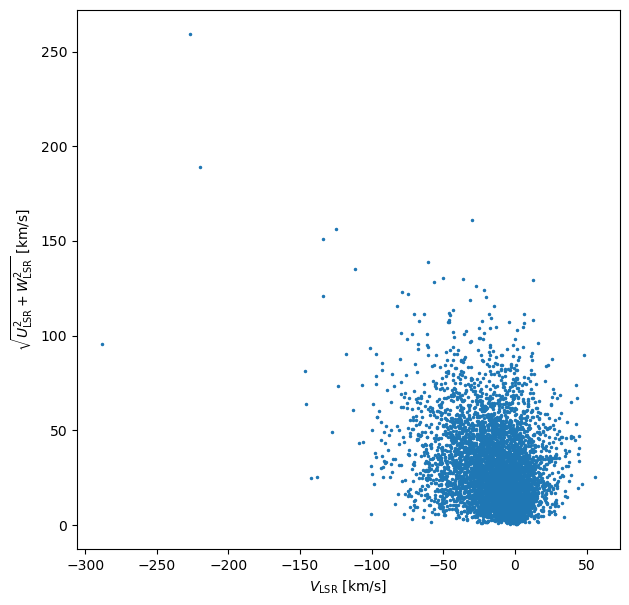

In [36]:
fig = pl.figure(figsize=(7,7))
fig.subplots_adjust(wspace=0.3)
ax1 = fig.add_subplot(111)

# using all of the integrated orbits

ax1.plot(a_stars.V(),np.sqrt(a_stars.U()**2 + a_stars.W()**2), marker='.', ms=3, ls='none')

ax1.set_xlabel(r'$V_{\rm LSR}$ [km/s]')
ax1.set_ylabel(r'$\sqrt{U^2_{\rm LSR} + W^2_{\rm LSR}}$ [km/s]')

pl.show()

Plotting vertical component of angular momentum (Lz) vs orbital eccentricity.

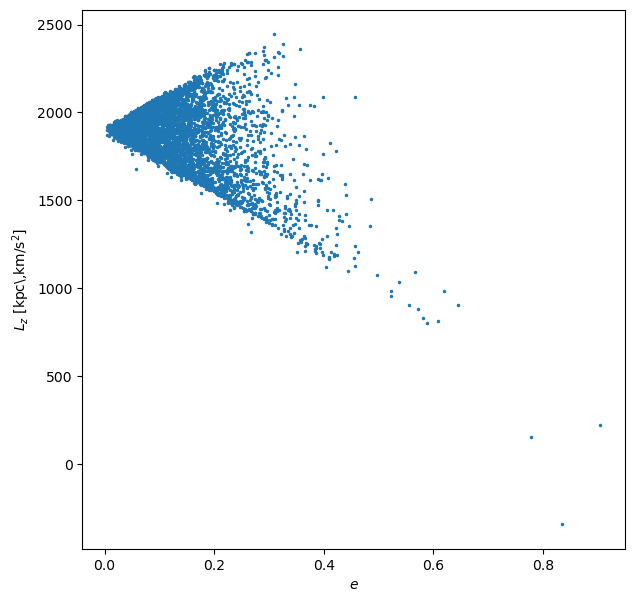

In [37]:
fig = pl.figure(figsize=(7,7))
fig.subplots_adjust(wspace=0.3)
ax1 = fig.add_subplot(111)

# using all the integrated orbits

ax1.plot(a_stars.e(),a_stars.Lz(), marker='.', ms=3, ls='none')

ax1.set_xlabel(r'$e$')
ax1.set_ylabel(r'$L_z$ [kpc\,km/s$^2$]')

pl.show()